# Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## 0 - Importando os Dados em um DataFrame

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 1 - Análise Exploratória de Dados

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 1.1 - Gráficos

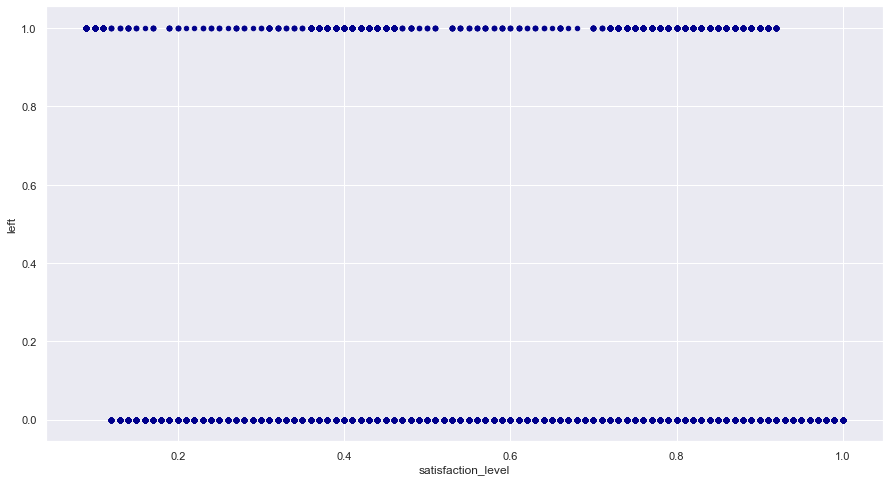

In [5]:
df.plot.scatter(x=df.columns[0], y='left', c='DarkBlue', figsize=(15,8));

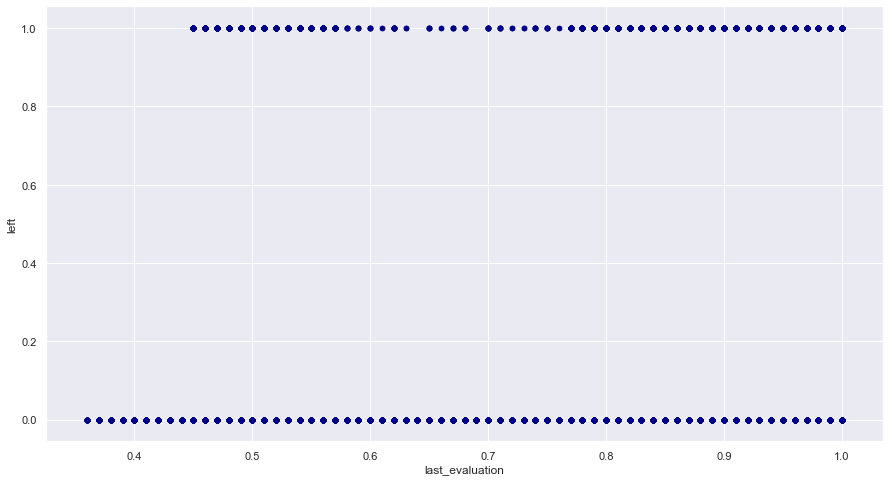

In [6]:
df.plot.scatter(x=df.columns[1], y='left', c='DarkBlue', figsize=(15,8));

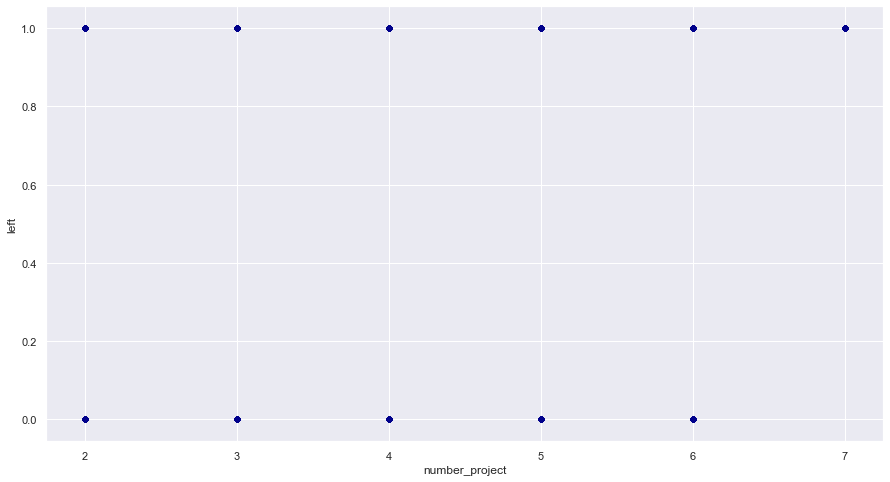

In [7]:
df.plot.scatter(x=df.columns[2], y='left', c='DarkBlue', figsize=(15,8));

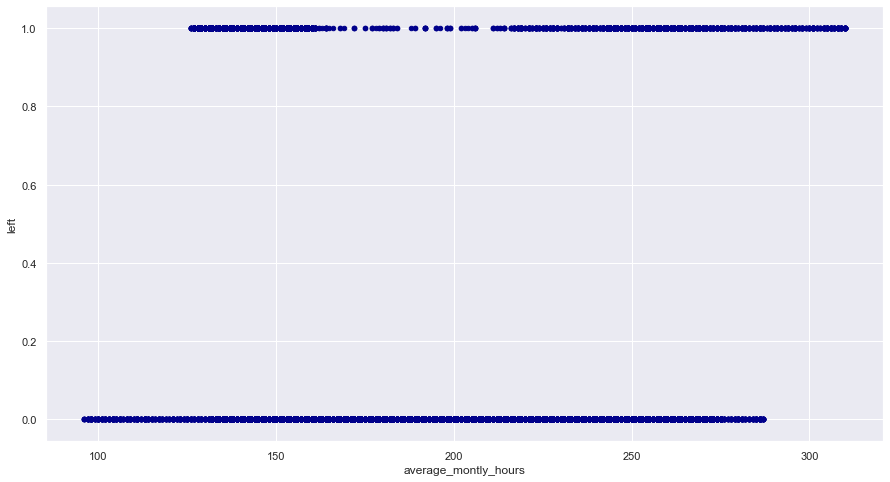

In [8]:
df.plot.scatter(x=df.columns[3], y='left', c='DarkBlue', figsize=(15,8));

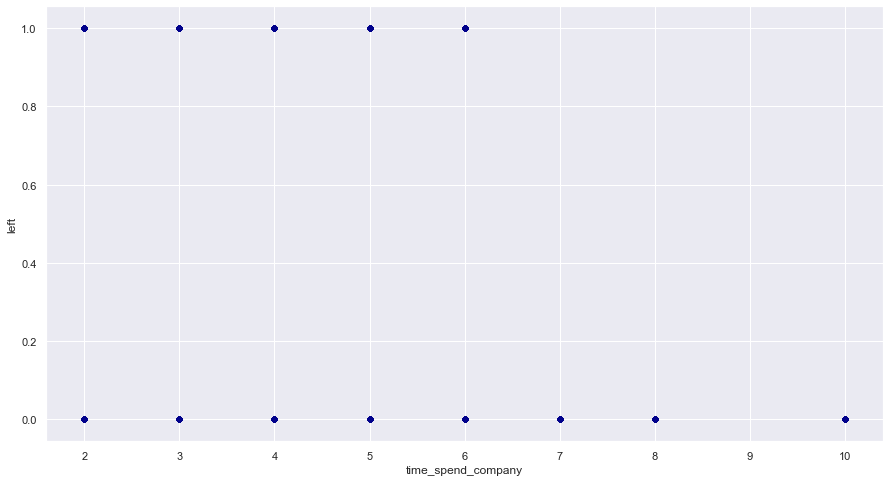

In [9]:
df.plot.scatter(x=df.columns[4], y='left', c='DarkBlue', figsize=(15,8));

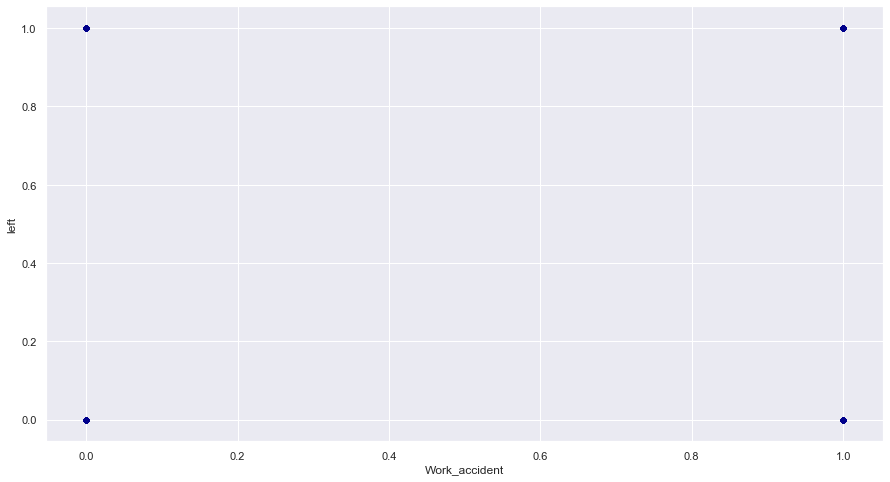

In [10]:
df.plot.scatter(x=df.columns[5], y='left', c='DarkBlue', figsize=(15,8));

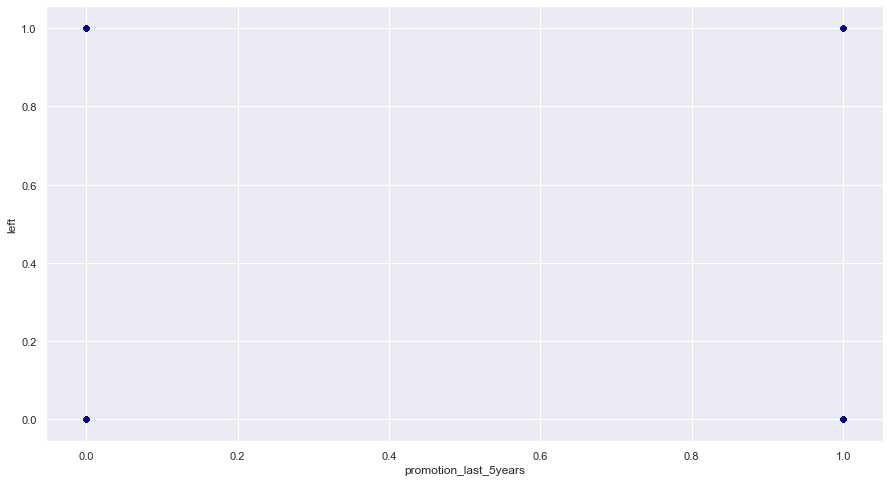

In [11]:
df.plot.scatter(x=df.columns[7], y='left', c='DarkBlue', figsize=(15,8));

### 1.2 - Groupby

In [12]:
df.groupby(by='left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Dá para tirar 3 fatores que aparentam ter relação com a saída da firma, a partir desta coluna e usando os gráficos acima também:

- **Satisfaction Level**: Os índices tendem a ser baixos (0.44) em empregados que saem da firma. Aqueles que ficam possuem um relativamente maior (0.66)
- **Average Monthly Hours**: Os empregados que saem possuem uma média de horas menores (199) em comparação aos que ficam (207)
- **Promotion Last 5 Years**: Empregados que receberam promoções tendem a ficar na empresa (0.026), enquanto quem não recebe tende a sair (0.005)

### 1.3 - Caracterizando Variáveis Departamento e Salário

In [13]:
df.iloc[:, -2:].nunique()

Department    10
salary         3
dtype: int64

In [14]:
pd.get_dummies(df)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [15]:
pd.get_dummies(df).groupby(by='left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
left,,,,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021,0.101068,0.450123,0.448810
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183,0.022963,0.608233,0.368804


## 2 - Impacto do Salário na Retenção dos Funcionários

In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

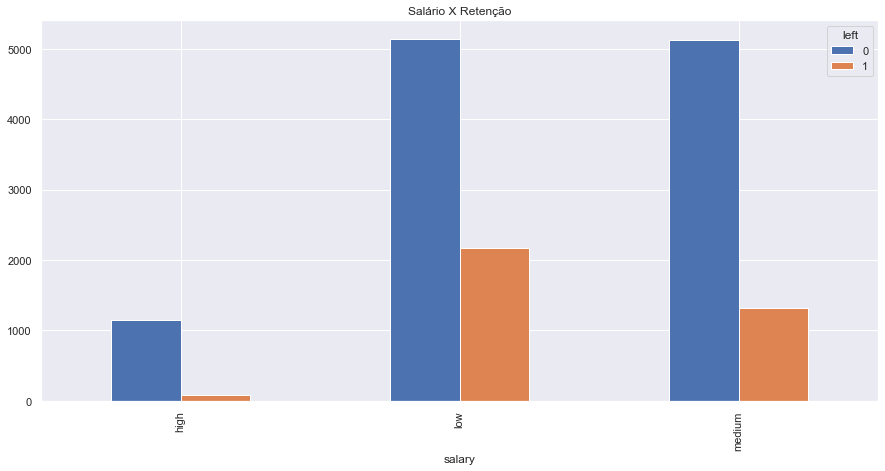

In [21]:
pd.crosstab(df.salary,df.left).plot(kind='bar', title='Salário X Retenção', figsize=(15,7));

## 3 - Correlação entre Departamento e Retenção

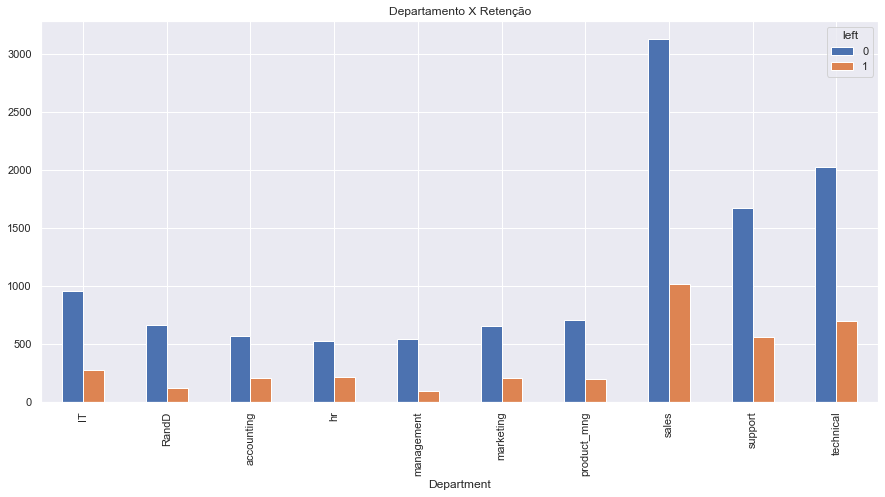

In [22]:
pd.crosstab(df.Department,df.left).plot(kind='bar', title='Departamento X Retenção', figsize=(15,7));

# Conclusão a Respeito dos Fatores:
## **Satisfaction Level**
## **Average Monthly Hours**
## **Promotion Last 5 Years**
## **Salary**

## 4 - Criar Modelo de Regressão Logística

In [23]:
from sklearn.linear_model import LogisticRegression

### 4.1 - Dividindo o Dataset em Treino e Teste

In [24]:
df_modelo = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df_modelo.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [25]:
dummies = pd.get_dummies(df_modelo)
dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [26]:
X = dummies
y = df['left']

In [27]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

### 4.2 - Treinando o Modelo

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 5 - Acurácia do Modelo

In [36]:
model.score(X_test,y_test)

0.7763809523809524